<a href="https://colab.research.google.com/github/jmestralet/Proyecto_DS_Coderhouse/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción al dataset elegido

El presente trabajo, parte de un dataset de clientes de un comercio, disponible en la Web.

Este incluye datos respecto a: aspectos demograficos del cliente, comportamiento de compra,satisfacción respecto al servicio, relacion actual con la empresa, datos geográficos de los puntos de venta, entre otros.

## Listado de columnas y significado:

*  ID de cliente:	Identificador único para cada cliente.
*  Edad:	edad del cliente
* Género	El género del cliente (Hombre, Mujer, Otro).
* Tipo de cuenta	Tipo de cuenta (Corriente, Ahorro, Inversión).
* Saldo de la cuenta	El saldo en la cuenta del cliente, indica estabilidad financiera.
* Fecha de transacción	Fecha de la última transacción realizada por el cliente.
* Monto de la transacción	Importe de la última transacción, indicando el compromiso del cliente.
* Tipo de transacción	Tipo de la última transacción (Depósito, Retiro, etc.).
* Rama	Ubicación de la sucursal donde se encuentra la cuenta.
* Monto del préstamo	Importe de cualquier préstamo obtenido por el cliente.
* Puntuación crediticia	La puntuación crediticia del cliente, que indica su salud financiera.
* Está_empleado	Si el cliente está empleado (Verdadero/Falso).
* Ingresos anuales	El ingreso anual total del cliente.
* Estado civil	El estado civil del cliente (soltero, casado, etc.).
* Sucursal:	La región geográfica del cliente.
* Fecha de apertura de la cuenta	La fecha en que se abrió la cuenta del cliente.
* Fecha de la última transacción	Fecha de la más reciente transacción realizada por el cliente.
* Número_de_transacciones	Número total de transacciones en el último año.
* Tendencia de actividad de la cuenta	Si la actividad de la cuenta está aumentando, disminuyendo o es estable.
* Interacciones de servicio al cliente	Número de interacciones con el servicio de atención al cliente que posiblemente indiquen insatisfacción.
*Quejas recientes	Número de quejas realizadas por el cliente, que potencialmente indican insatisfacción.
* Cambio en el saldo de la cuenta	Cambio en el saldo de la cuenta a lo largo del tiempo, lo que indica estabilidad o dificultad financiera.
* Puntuación de satisfacción del cliente	Calificación de satisfacción del cliente (1-5), donde las puntuaciones más bajas indican un mayor riesgo de abandono.
* Etiqueta de abandono	Indica si el cliente ha abandonado el servicio (1) o no (0).
* Periodo de tiempo de abandono	Si se agita, el número de meses hace que ocurrió.

Fuente del dataset: https://www.kaggle.com/datasets/simronw/churn-prediction-unlocking-retention-secrets

## Objetivo del proyecto:
Partiendo de los datos anteriores, se busca encontrar caracteristicas y/o patrones que permitan identificar clientes con alta propabilidad de fugarse.


#Importación de librerías
Se importan todas las librerías que serán utilizadas en el proyecto

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

# Ignorar todos los warnings
warnings.filterwarnings('ignore')

## Carga  del dataset y primeras transformaciones
El dataset se encuentra en formato csv, por lo que se carga de la siguiente forma.

In [ ]:
df = pd.read_csv('Abandono_de_clientes.csv', sep=';')

Antes de comenzar a explorar los datos, se traducen los nomnbres de las columnas a Español:

In [ ]:
print('Columnas:')
df.columns


Columnas:


Index(['Customer_ID', 'Age', 'Gender', 'Account_Type', 'Account_Balance',
       'Transaction_Date', 'Transaction_Amount', 'Transaction_Type', 'Branch',
       'Loan_Amount', 'Loan_Type', 'Credit_Score', 'Is_Employed',
       'Annual_Income', 'Marital_Status', 'Region', 'Account_Open_Date',
       'Last_Transaction_Date', 'Number_of_Transactions',
       'Account_Activity_Trend', 'Customer_Service_Interactions',
       'Recent_Complaints', 'Change_in_Account_Balance',
       'Customer_Satisfaction_Score', 'Churn_Label', 'Churn_Timeframe'],
      dtype='object')

In [ ]:
df=df.rename(columns={'Customer_ID':'Cliente_ID',
                      'Age':'Edad',
                      'Gender':'Genero',
                      'Account_Type':'Tipo de cuenta',
                      'Account_Balance':'Saldo de cuenta',
                      'Transaction_Date':'Fecha de transaccion',
                      'Transaction_Amount':'Monto de transaccion',
                      'Transaction_Type':'Tipo de transaccion',
                      'Branch':'Rama',
                      'Loan_Amount':'Monto de prestamo',
                      'Loan_Type':'Tipo de prestamo',
                      'Credit_Score':'Score crediticio',
                      'Is_Employed':'Es empleado',
                      'Annual_Income':'Ingreso anual',
                      'Marital_Status':'Estado Civil',
                      'Account_Open_Date':'Fecha de apertura de cuenta',
                      'Last_Transaction_Date':'Fecha de ultima transaccion',
                      'Number_of_Transactions':'Numero de transacciones',
                      'Account_Activity_Trend':'Tendencia de actividad en cuenta',
                      'Customer_Service_Interactions':'Interacciones de servicio al cliente',
                      'Recent_Complaints':'Quejas recientes',
                      'Change_in_Account_Balance':'Cambio en saldo de cuenta',
                      'Customer_Satisfaction_Score':'Puntuación de satisfacción del cliente',
                      'Churn_Label':'Etiqueta de abandono',
                      'Churn_Timeframe':'Periodo de tiempo de abandono (meses)'})
print('Columnas renombradas:')
df.columns

Columnas renombradas:


Index(['Cliente_ID', 'Edad', 'Genero', 'Tipo de cuenta', 'Saldo de cuenta',
       'Fecha de transaccion', 'Monto de transaccion', 'Tipo de transaccion',
       'Rama', 'Monto de prestamo', 'Tipo de prestamo', 'Score crediticio',
       'Es empleado', 'Ingreso anual', 'Estado Civil', 'Region',
       'Fecha de apertura de cuenta', 'Fecha de ultima transaccion',
       'Numero de transacciones', 'Tendencia de actividad en cuenta',
       'Interacciones de servicio al cliente', 'Quejas recientes',
       'Cambio en saldo de cuenta', 'Puntuación de satisfacción del cliente',
       'Etiqueta de abandono', 'Periodo de tiempo de abandono (meses)'],
      dtype='object')

Se observan algunos registros y columnas para observar la composición de la tabla

In [ ]:
print('Primeros 4 registros:')
df.head(4)

Primeros 4 registros:


,Cliente_ID,Edad,Genero,Tipo de cuenta,Saldo de cuenta,Fecha de transaccion,Monto de transaccion,Tipo de transaccion,Rama,Monto de prestamo,...,Fecha de apertura de cuenta,Fecha de ultima transaccion,Numero de transacciones,Tendencia de actividad en cuenta,Interacciones de servicio al cliente,Quejas recientes,Cambio en saldo de cuenta,Puntuación de satisfacción del cliente,Etiqueta de abandono,Periodo de tiempo de abandono (meses)
0,8f0b813f-971a-45c8-8347-48a0d5cd3f2e,50,Female,Savings,26046.21,14/2/2025,4819.48,Payment,Freemanview,1063.29,...,26/8/2022,24/3/2025,8,Increasing,1,2,-1024.51,1,1,1
1,ec299825-6aa6-47f3-bfc0-0b65d3d4b1e3,69,Female,Checking,27415.23,26/2/2025,3072.79,Deposit,Floresmouth,35493.90,...,18/6/2024,2/3/2025,4,Stable,1,0,-2900.10,3,0,0
2,3f992fba-cd14-417e-b5d9-55173b985bef,38,Female,Checking,86709.64,26/3/2025,1423.93,Deposit,West Francis,0.00,...,17/8/2020,13/3/2025,2,Increasing,4,0,-2600.01,1,0,0
3,be551680-156f-4f47-b283-192bbcb80571,57,Male,Savings,56826.79,25/2/2025,3929.43,Deposit,Diazport,41939.84,...,15/9/2023,26/3/2025,18,Stable,0,2,154.73,1,1,11


Columnas del dataframe

In [ ]:
print('Columnas del dataframe')
df.dtypes

Columnas del dataframe


,0
Cliente_ID,object
Edad,int64
Genero,object
Tipo de cuenta,object
Saldo de cuenta,float64
Fecha de transaccion,object
Monto de transaccion,float64
Tipo de transaccion,object
Rama,object
Monto de prestamo,float64


Se cambia el formato de algunas columnas

In [ ]:
fecha_corte='2025-03-31'
df['Fecha_corte']= pd.to_datetime(fecha_corte)
df['Fecha de transaccion'] = pd.to_datetime(df['Fecha de transaccion'])
df['Fecha de apertura de cuenta'] = pd.to_datetime(df['Fecha de apertura de cuenta'])
df['Fecha de ultima transaccion'] = pd.to_datetime(df['Fecha de ultima transaccion'])


Se crean variables que resultarán de utilidad en el análisis

In [ ]:
#Antiguedad en años: indica la cantidad de años que el cliente pertenece a la empresa
df['Antiguedad en años'] = (df['Fecha_corte'] - df['Fecha de apertura de cuenta']).dt.days / 365
#Frecuencia de transacciones por año
df['Frecuencia de transacciones por año'] = df['Numero de transacciones']/df['Antiguedad en años']
#Recencia: indica el tiempo desde la última transacción
df['Recencia'] = (df['Fecha_corte'] - df['Fecha de ultima transaccion']).dt.days


Estructura del dataframe

In [ ]:
filas, columnas = df.shape
print(f'El df esta compuesto por {filas} filas y {columnas} columnas')

El df esta compuesto por 5000 filas y 30 columnas


Detalle de las columnas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Cliente_ID                              5000 non-null   object        
 1   Edad                                    5000 non-null   int64         
 2   Genero                                  5000 non-null   object        
 3   Tipo de cuenta                          5000 non-null   object        
 4   Saldo de cuenta                         5000 non-null   float64       
 5   Fecha de transaccion                    5000 non-null   datetime64[ns]
 6   Monto de transaccion                    5000 non-null   float64       
 7   Tipo de transaccion                     5000 non-null   object        
 8   Rama                                    5000 non-null   object        
 9   Monto de prestamo                       5000 non-nul

Se observan valores nulos en la columna 'Tipo de Prestamo'. Se procede a chequear los nulos por columna, a fin de realizar un segundo chequeo.

##Chequeo de valores nulos

In [ ]:
# Calcular el porcentaje de valores nulos por columna
print("\nPorcentaje de valores nulos por columna:")
print((df.isnull().sum() / len(df)) * 100)


Porcentaje de valores nulos por columna:
Cliente_ID                                 0.0
Edad                                       0.0
Genero                                     0.0
Tipo de cuenta                             0.0
Saldo de cuenta                            0.0
Fecha de transaccion                       0.0
Monto de transaccion                       0.0
Tipo de transaccion                        0.0
Rama                                       0.0
Monto de prestamo                          0.0
Tipo de prestamo                          76.0
Score crediticio                           0.0
Es empleado                                0.0
Ingreso anual                              0.0
Estado Civil                               0.0
Region                                     0.0
Fecha de apertura de cuenta                0.0
Fecha de ultima transaccion                0.0
Numero de transacciones                    0.0
Tendencia de actividad en cuenta           0.0
Interacciones de s

Se define un umbral del 30%, para los nulos por columna, y se eliminan aquellas que no superen el mismo

In [ ]:
# Definir un umbral
umbral = 0.3 * len(df)

# Identificar columnas a eliminar
columnas_a_eliminar = df.columns[df.isnull().sum() > umbral]
print("Columnas a eliminar, con más del 30% de NaN:", columnas_a_eliminar.tolist())

# Eliminar las columnas identificadas
df.drop(columns=columnas_a_eliminar, inplace=True)

print("\nTamaño del DataFrame original:", df.shape)
print("Tamaño después de eliminar columnas con >30% NaN:", df.shape)

Columnas a eliminar, con más del 30% de NaN: ['Tipo de prestamo']

Tamaño del DataFrame original: (5000, 29)
Tamaño después de eliminar columnas con >30% NaN: (5000, 29)


La columna 'Tipo de prestamo' presenta un 76% de valores nulos, lo que supera al umbral definido. Por lo anterior, se procede a eliminarla del analisis

##Valores distintos por columna

Valores distintos

In [ ]:
distintos_por_columna = df.nunique()
print(distintos_por_columna)

Cliente_ID                                5000
Edad                                        53
Genero                                       3
Tipo de cuenta                               3
Saldo de cuenta                           4999
Fecha de transaccion                        89
Monto de transaccion                      4975
Tipo de transaccion                          4
Rama                                      4312
Monto de prestamo                         1486
Score crediticio                           551
Es empleado                                  2
Ingreso anual                             4998
Estado Civil                                 4
Region                                       4
Fecha de apertura de cuenta               1796
Fecha de ultima transaccion                 89
Numero de transacciones                     20
Tendencia de actividad en cuenta             3
Interacciones de servicio al cliente         6
Quejas recientes                             3
Cambio en sal

Valores iguales a cero

In [ ]:
ceros_por_col = (df == 0).sum()
print(ceros_por_col)

Cliente_ID                                   0
Edad                                         0
Genero                                       0
Tipo de cuenta                               0
Saldo de cuenta                              0
Fecha de transaccion                         0
Monto de transaccion                         0
Tipo de transaccion                          0
Rama                                         0
Monto de prestamo                         3514
Score crediticio                             0
Es empleado                               2457
Ingreso anual                                0
Estado Civil                                 0
Region                                       0
Fecha de apertura de cuenta                  0
Fecha de ultima transaccion                  0
Numero de transacciones                      0
Tendencia de actividad en cuenta             0
Interacciones de servicio al cliente       825
Quejas recientes                          1656
Cambio en sal

Se identifican los valores distintos por columna. Se detecta que la columna Monto de prestamo tiene 3.514 valores en cero, que corresponderían a clientes que no accedieron a un prestamo con la empresa. A fin de mejorar esta identificacion, se crea la columna tuvo_prestamo, para utilizar durante el análisis.

Los valores del resto de las columnas se ven coherentes

In [ ]:
#Se crea la columna 'Tuvo prestamo', la cual indica si el cliente en algún momento adquirió un prestamo con la empresa
def tuvo_prestamo(row):
    if row['Monto de prestamo'] > 0:
        return 'Si'
    else:
        return 'No'

# Aplicar la función a cada fila
df['Tuvo prestamo'] = df.apply(tuvo_prestamo, axis=1)

## Estadisticos descriptivos

In [ ]:
print('Estadisticos descriptivos:')
df.describe()

Estadisticos descriptivos:


,Edad,Saldo de cuenta,Fecha de transaccion,Monto de transaccion,Monto de prestamo,Score crediticio,Ingreso anual,Fecha de apertura de cuenta,Fecha de ultima transaccion,Numero de transacciones,Interacciones de servicio al cliente,Quejas recientes,Cambio en saldo de cuenta,Puntuación de satisfacción del cliente,Etiqueta de abandono,Periodo de tiempo de abandono (meses),Fecha_corte,Antiguedad en años,Frecuencia de transacciones por año,Recencia
count,5000.000000,5000.000000,5000,5000.000000,5000.00000,5000.000000,5000.000000,5000,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000,5000.000000,5000.000000,5000.000000
mean,43.930000,50378.659748,2025-02-14 08:03:15.839999744,2519.289100,7661.64505,574.537800,110500.612678,2022-08-15 14:34:39.360000,2025-02-13 12:18:08.639999744,10.468200,2.530000,1.016000,46.275696,3.036600,0.316600,2.124400,2025-03-31 00:00:00,2.625733,17.305446,45.487400
min,18.000000,509.950000,2025-01-01 00:00:00,10.480000,0.00000,300.000000,20019.560000,2020-01-01 00:00:00,2025-01-01 00:00:00,1.000000,0.000000,0.000000,-4999.230000,1.000000,0.000000,0.000000,2025-03-31 00:00:00,0.002740,0.190900,1.000000
25%,31.000000,26085.310000,2025-01-23 00:00:00,1258.035000,0.00000,438.000000,66260.917500,2021-04-23 18:00:00,2025-01-23 00:00:00,5.000000,1.000000,0.000000,-2474.207500,2.000000,0.000000,0.000000,2025-03-31 00:00:00,1.315068,2.073275,23.000000
50%,44.000000,50587.400000,2025-02-14 00:00:00,2548.545000,0.00000,573.000000,110586.580000,2022-08-28 00:00:00,2025-02-13 00:00:00,11.000000,3.000000,1.000000,36.780000,3.000000,0.000000,0.000000,2025-03-31 00:00:00,2.591781,4.028205,46.000000
75%,57.000000,75093.985000,2025-03-09 00:00:00,3733.492500,9045.88000,708.000000,155956.980000,2023-12-07 00:00:00,2025-03-08 00:00:00,15.000000,4.000000,2.000000,2566.350000,4.000000,1.000000,3.000000,2025-03-31 00:00:00,3.937671,7.978142,67.000000
max,70.000000,99994.250000,2025-03-30 00:00:00,4999.930000,49953.14000,850.000000,199911.090000,2025-03-30 00:00:00,2025-03-30 00:00:00,20.000000,5.000000,2.000000,4999.570000,5.000000,1.000000,12.000000,2025-03-31 00:00:00,5.249315,6935.000000,89.000000
std,15.187285,28436.192789,NaN,1436.423023,14021.98745,158.134083,52015.230170,NaN,NaN,5.733059,1.719561,0.823577,2899.725824,1.426628,0.465196,3.657814,NaN,1.511140,144.312680,25.573569


In [ ]:
# Selecciona solo columnas float
#columnas_float = df.select_dtypes(include=['float']).columns

# Convierte esas columnas a int
#df[columnas_float] = df[columnas_float].astype(int)

# Analisis de variables

In [ ]:
Cliente_ID                                   0
Edad                                         0
Genero                                       0
Tipo de cuenta                               0
Saldo de cuenta                              0
Fecha de transaccion                         0
Monto de transaccion                         0
Tipo de transaccion                          0
Rama                                         0
Monto de prestamo                         3514
Score crediticio                             0
Es empleado                               2457
Ingreso anual                                0
Estado Civil                                 0
Region                                       0
Fecha de apertura de cuenta                  0
Fecha de ultima transaccion                  0
Numero de transacciones                      0
Tendencia de actividad en cuenta             0
Interacciones de servicio al cliente       825
Quejas recientes                          1656
Cambio en saldo de cuenta                    0
Puntuación de satisfacción del cliente       0
Etiqueta de abandono                      3417
Periodo de tiempo de abandono (meses)     3417
Fecha_corte                                  0
Tuvo prestamo

**Clientes fugados**

La variable 'Etiqueta de abandono' indica:

0 = Cliente Activo


1 = Cliente fugado


In [362]:

# Contar los 'Cliente_ID' por cada 'Etiqueta de abandono'
conteo = df.groupby('Etiqueta de abandono')['Cliente_ID'].agg('count').reset_index()

# Calcular el total de 'Cliente_ID' en el DataFrame
total_clientes = df['Cliente_ID'].nunique()

# Agregar la columna de porcentaje


# Mostrar el resultado
print('Proporción de clientes según etiqueta de abandono:')
print(conteo)


Proporción de clientes según etiqueta de abandono:
   Etiqueta de abandono  Cliente_ID
0                     0        3417
1                     1        1583


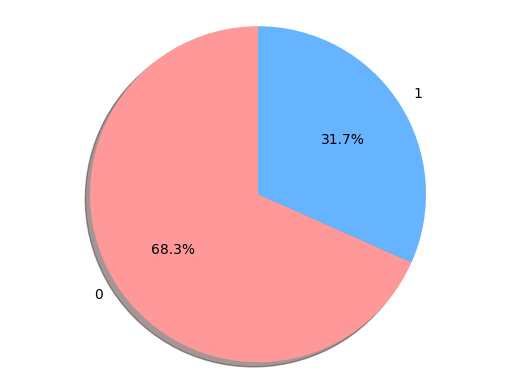

In [364]:
# Contar las frecuencias de la columna 'Etiqueta de abandono'
conteo = df['Etiqueta de abandono'].value_counts()

# Crear el gráfico circular
fig, ax = plt.subplots()
ax.pie(conteo, labels=conteo.index, colors=['#ff9999', '#66b3ff'],
       autopct='%1.1f%%', shadow=True, startangle=90)

# Asegurar que el gráfico sea un círculo
ax.axis('equal')

# Mostrar el gráfico
plt.show()

El 31% de la cartera de clientes del dataset no se encuentra activo.

In [ ]:

# Contar los 'Cliente_ID' por cada 'Etiqueta de abandono'
conteo = df.groupby('Es empleado')['Cliente_ID'].agg('count').reset_index()

# Calcular el total de 'Cliente_ID' en el DataFrame
total_clientes = df['Cliente_ID'].nunique()

# Agregar la columna de porcentaje
conteo['Porcentaje'] = (conteo['Cliente_ID'] / total_clientes) * 100

# Mostrar el resultado
print('Proporción de clientes según Es empleado:')
print(conteo)


Proporción de clientes según Es empleado:
   Es empleado  Cliente_ID  Porcentaje
0        False        2457       49.14
1         True        2543       50.86


In [ ]:
# Contar los registros por categoría
total_por_categoria = df.groupby('Es empleado')['Cliente_ID'].count()

# Contar los fugados por categoría (Etiqueta de abandono = 1)
fugados_por_categoria = df[df['Etiqueta de abandono'] == 1].groupby('Es empleado')['Cliente_ID'].count()

# Calcular el porcentaje de fugados en cada categoría
porcentaje_fugados = (fugados_por_categoria / total_por_categoria) * 100

# Mostrar los resultados
print(porcentaje_fugados)

Es empleado
False    32.071632
True     31.262289
Name: Cliente_ID, dtype: float64


In [ ]:
# Contar los 'Cliente_ID' por cada 'Etiqueta de abandono'
conteo = df.groupby('Genero')['Cliente_ID'].agg('count').reset_index()

# Calcular el total de 'Cliente_ID' en el DataFrame
total_clientes = df['Cliente_ID'].nunique()

# Agregar la columna de porcentaje
conteo['Porcentaje'] = (conteo['Cliente_ID'] / total_clientes) * 100

# Mostrar el resultado
print('Proporción de clientes según Genero:')
print(conteo)


In [ ]:
# Contar los registros por categoría
total_por_categoria = df.groupby('Genero')['Cliente_ID'].count()

# Contar los fugados por categoría (Etiqueta de abandono = 1)
fugados_por_categoria = df[df['Etiqueta de abandono'] == 1].groupby('Genero')['Cliente_ID'].count()

# Calcular el porcentaje de fugados en cada categoría
porcentaje_fugados = (fugados_por_categoria / total_por_categoria) * 100

# Mostrar los resultados
print(porcentaje_fugados)

Genero
Female    31.423402
Male      31.731910
Other     31.823671
Name: Cliente_ID, dtype: float64


In [ ]:

conteo = df.groupby('Estado Civil')['Cliente_ID'].agg('count').reset_index()

# Calcular el total de 'Cliente_ID' en el DataFrame
total_clientes = df['Cliente_ID'].nunique()

# Agregar la columna de porcentaje
conteo['Porcentaje'] = (conteo['Cliente_ID'] / total_clientes) * 100

# Mostrar el resultado
print('Proporción de clientes según Estado Civil:')
print(conteo)


Proporción de clientes según Estado Civil:
  Estado Civil  Cliente_ID  Porcentaje
0     Divorced        1237       24.74
1      Married        1220       24.40
2       Single        1257       25.14
3      Widowed        1286       25.72


In [ ]:

conteo = df.groupby('Region')['Cliente_ID'].agg('count').reset_index()

# Calcular el total de 'Cliente_ID' en el DataFrame
total_clientes = df['Cliente_ID'].nunique()

# Agregar la columna de porcentaje
conteo['Porcentaje'] = (conteo['Cliente_ID'] / total_clientes) * 100

# Mostrar el resultado
print('Proporción de clientes según Region:')
print(conteo)


Proporción de clientes según Region:
  Region  Cliente_ID  Porcentaje
0   East        1255       25.10
1  North        1242       24.84
2  South        1238       24.76
3   West        1265       25.30


In [ ]:

conteo = df.groupby('Tendencia de actividad en cuenta')['Cliente_ID'].agg('count').reset_index()

# Calcular el total de 'Cliente_ID' en el DataFrame
total_clientes = df['Cliente_ID'].nunique()

# Agregar la columna de porcentaje
conteo['Porcentaje'] = (conteo['Cliente_ID'] / total_clientes) * 100

# Mostrar el resultado
print('Proporción de clientes según Tendencia de actividad en cuenta:')
print(conteo)


Proporción de clientes según Tendencia de actividad en cuenta:
  Tendencia de actividad en cuenta  Cliente_ID  Porcentaje
0                       Decreasing        1591       31.82
1                       Increasing        1729       34.58
2                           Stable        1680       33.60


In [ ]:
# 2) Total de clientes por 'Rama'
total_por_categoria = df.groupby('Rama')['Cliente_ID'].count()

# 3) Fugados por 'Rama' (Etiqueta de abandono == 1)
fugados = (
    df[df['Etiqueta de abandono'] == 1]
    .groupby('Rama')['Cliente_ID']
    .count()
    .reindex(total_por_categoria.index, fill_value=0)
)

# 4) Calcular porcentaje
porcentaje_fugados = (fugados / total_por_categoria) * 100

# 5) Filtrar para que solo aparezcan los porcentajes mayores que 0
resultado = pd.DataFrame({
    'Total': total_por_categoria,
    'Fugados': fugados,
    '% Fugados': porcentaje_fugados
})

# Filtrar para que solo aparezcan las categorías con un porcentaje > 0
resultado_no_cero = resultado[resultado['% Fugados'] > 0]

# 6) Mostrar el resultado
print(resultado_no_cero)

                Total  Fugados  % Fugados
Rama                                     
Aaronmouth          2        1       50.0
Adamsfort           1        1      100.0
Adamsstad           1        1      100.0
Adkinsbury          1        1      100.0
Alexanderburgh      1        1      100.0
...               ...      ...        ...
Yolandaton          1        1      100.0
Youngchester        1        1      100.0
Youngland           1        1      100.0
Zacharybury         1        1      100.0
Zacharyfort         1        1      100.0

[1494 rows x 3 columns]


In [ ]:
sns.set_theme(style="whitegrid") # Establece un tema visual agradable para los gráficos de Seaborn

In [ ]:
df_fugados=df[df['Etiqueta de abandono'] == 1]

In [ ]:
df_fugados.head(2)

,Cliente_ID,Edad,Genero,Tipo de cuenta,Saldo de cuenta,Fecha de transaccion,Monto de transaccion,Tipo de transaccion,Rama,Monto de prestamo,...,Quejas recientes,Cambio en saldo de cuenta,Puntuación de satisfacción del cliente,Etiqueta de abandono,Periodo de tiempo de abandono (meses),Fecha_corte,Antiguedad en años,Frecuencia de transacciones por año,Recencia,Tuvo prestamo
0,8f0b813f-971a-45c8-8347-48a0d5cd3f2e,50,Female,Savings,26046.21,2025-02-14,4819.48,Payment,Freemanview,1063.29,...,2,-1024.51,1,1,1,2025-03-31,2.597260,3.080169,7,Si
3,be551680-156f-4f47-b283-192bbcb80571,57,Male,Savings,56826.79,2025-02-25,3929.43,Deposit,Diazport,41939.84,...,2,154.73,1,1,11,2025-03-31,1.542466,11.669627,5,Si


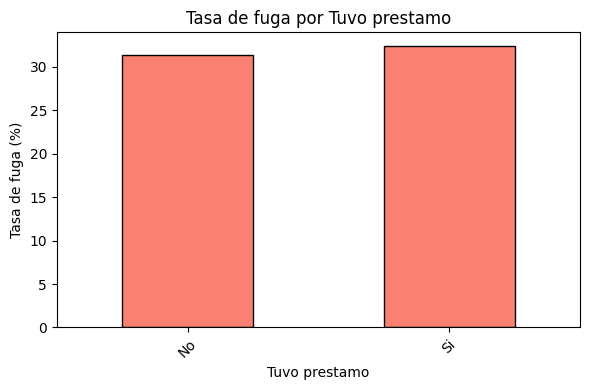

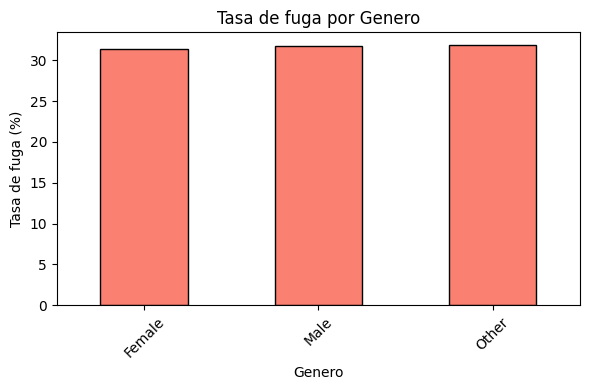

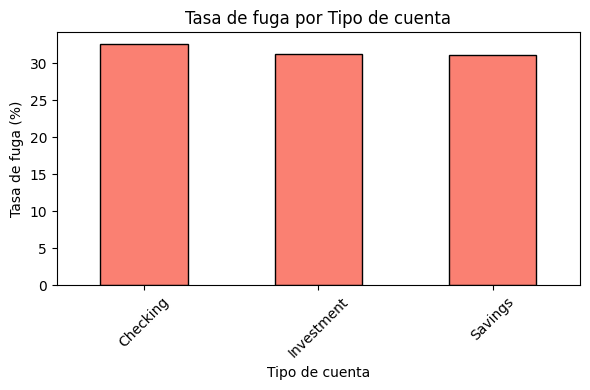

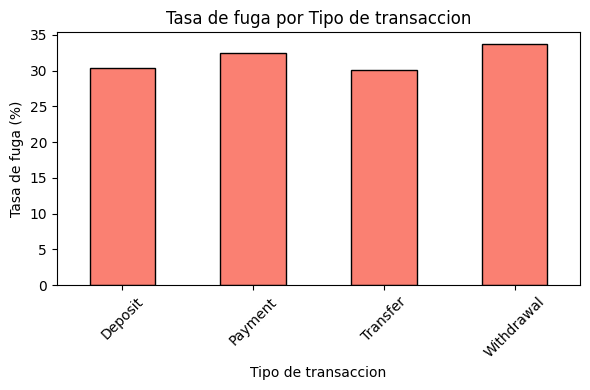

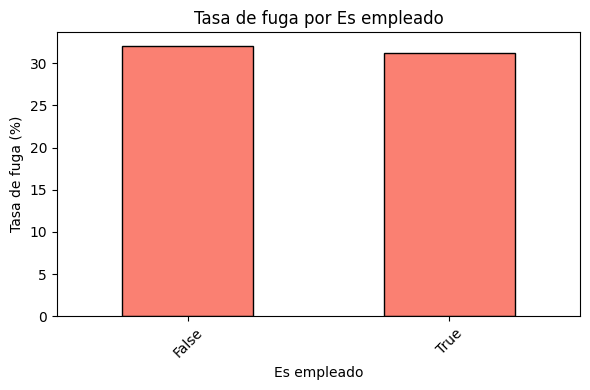

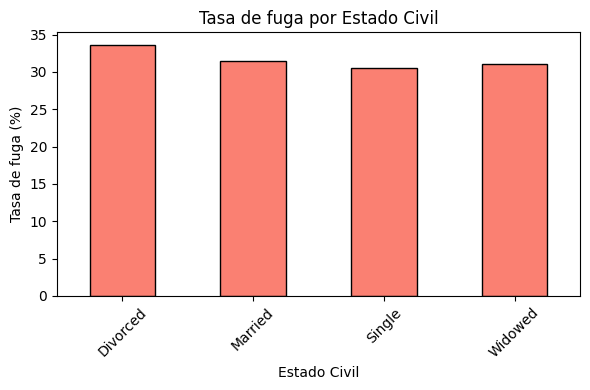

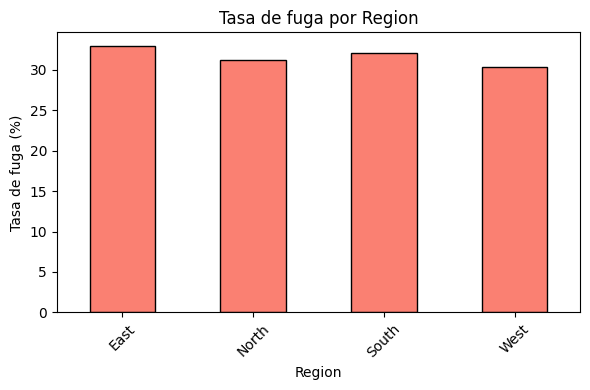

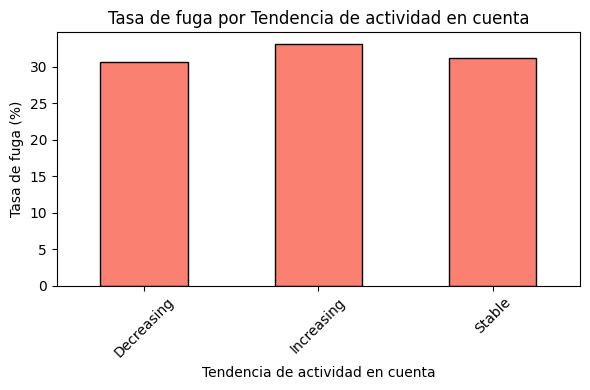

In [326]:
# Lista de variables categóricas que quieres comparar
categoricas = [
    'Tuvo prestamo', 'Genero', 'Tipo de cuenta', 'Tipo de transaccion',
    'Es empleado', 'Estado Civil', 'Region', 'Tendencia de actividad en cuenta'
]

for col in categoricas:
    # Calcular tasa de fuga por categoría
    tasa = df.groupby(col)['Etiqueta de abandono'].mean() * 100

    # Graficar
    fig, ax = plt.subplots(figsize=(6,4))
    tasa.plot(kind='bar', ax=ax, color='salmon', edgecolor='black')
    ax.set_title(f'Tasa de fuga por {col}')
    ax.set_ylabel('Tasa de fuga (%)')
    ax.set_xlabel(col)
    ax.tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.show()

La tasa de fuga, dentro de cada variable, es similar, por lo que a primera vista no son determinantes de la fuga de clientes

Histogramas

In [352]:
import matplotlib.pyplot as plt

def graficar_histograma_separado_por_fuga(df, columna):
    no_fugados = df[df['Etiqueta de abandono'] == 0]
    fugados = df[df['Etiqueta de abandono'] == 1]

    # Crear figura y ejes
    fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

    # Calcular las frecuencias relativas
    no_fugados_weights = np.ones_like(no_fugados[columna].dropna()) / len(no_fugados)
    fugados_weights = np.ones_like(fugados[columna].dropna()) / len(fugados)

    # Graficar para los no fugados
    axes[0].hist(no_fugados[columna].dropna(), bins=6, color='skyblue', edgecolor='black', weights=no_fugados_weights)
    axes[0].set_title(f'{columna} — No fugados')
    axes[0].set_xlabel(columna)
    axes[0].set_ylabel('Frecuencia relativa')

    # Graficar para los fugados
    axes[1].hist(fugados[columna].dropna(), bins=6, color='salmon', edgecolor='black', weights=fugados_weights)
    axes[1].set_title(f'{columna} — Fugados')
    axes[1].set_xlabel(columna)
    axes[1].set_ylabel('Frecuencia relativa')

    # Ajustar el layout
    plt.tight_layout()
    plt.show()

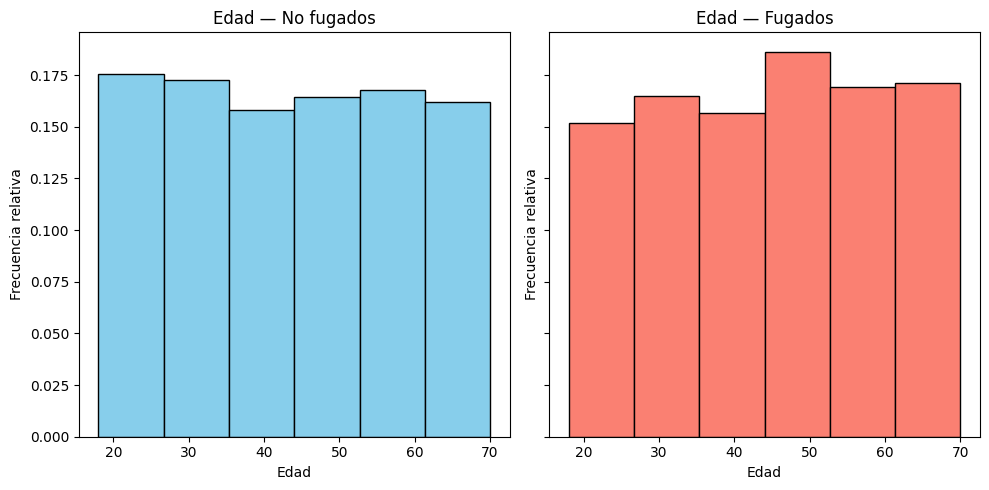

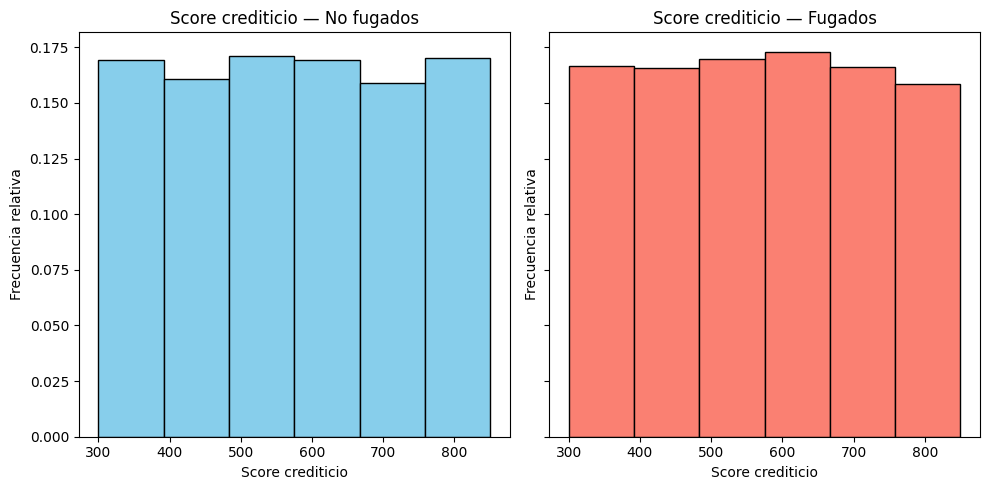

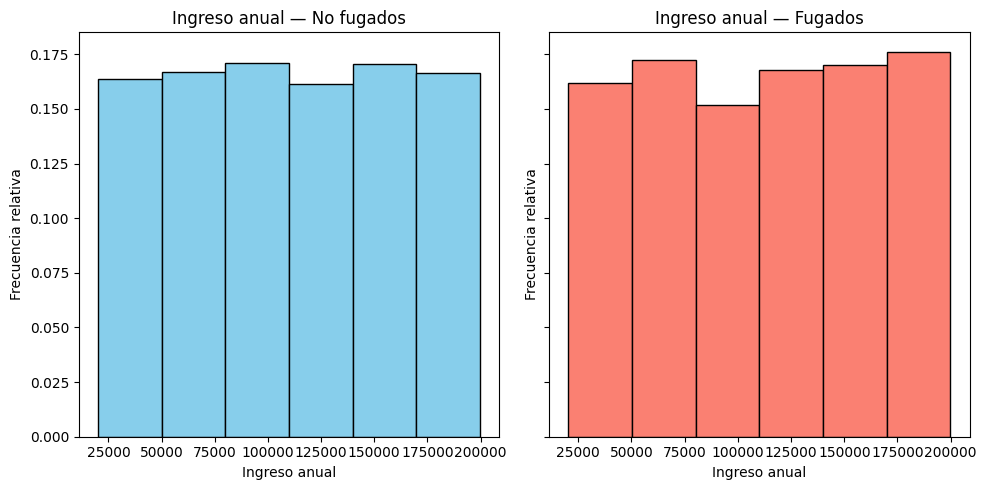

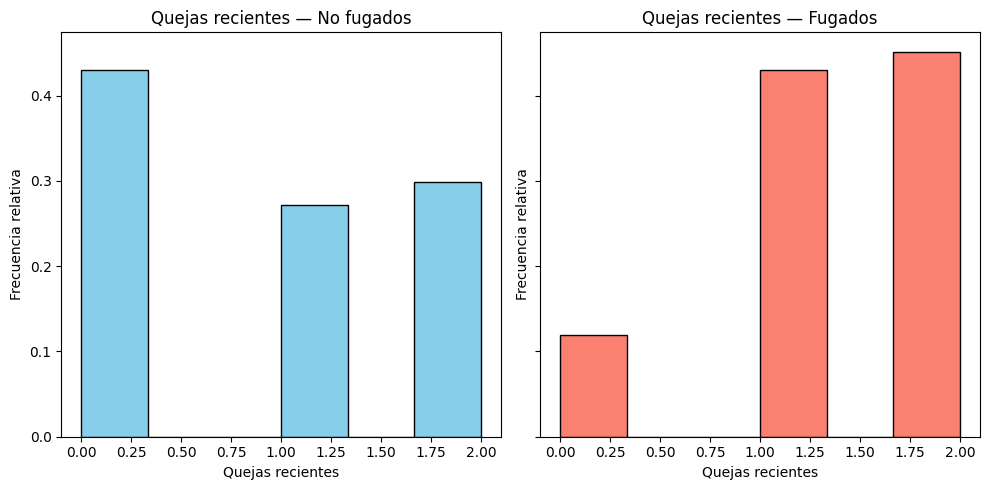

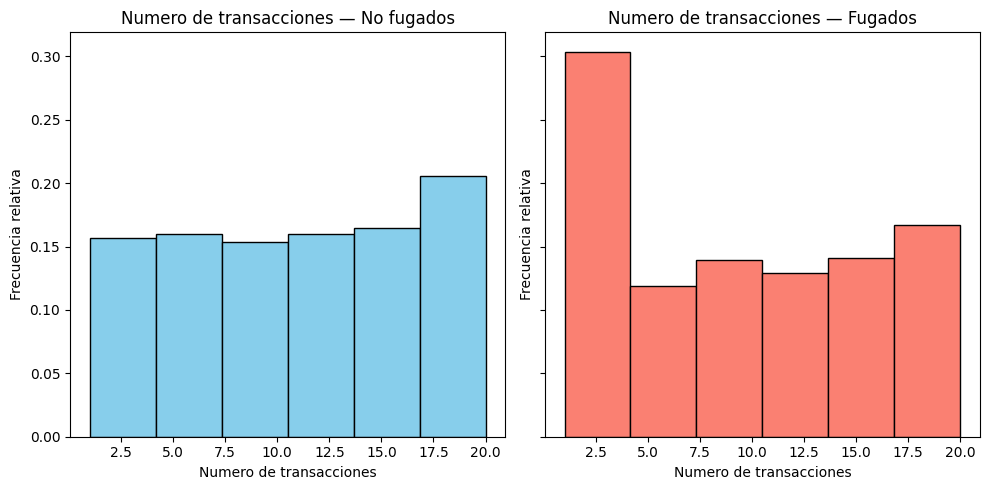

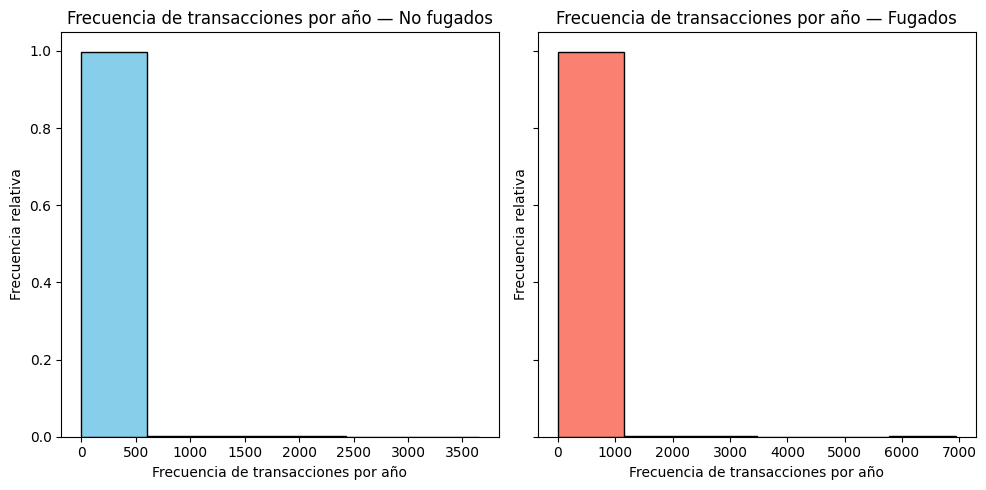

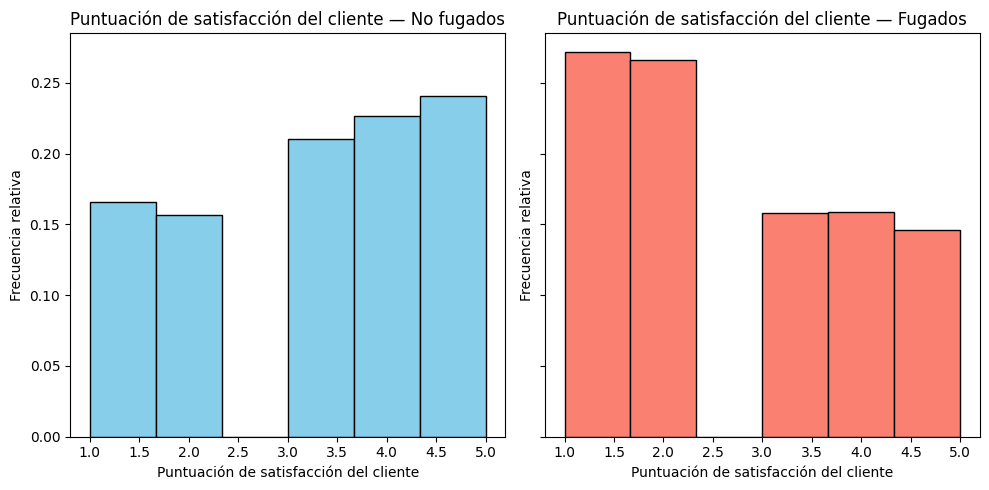

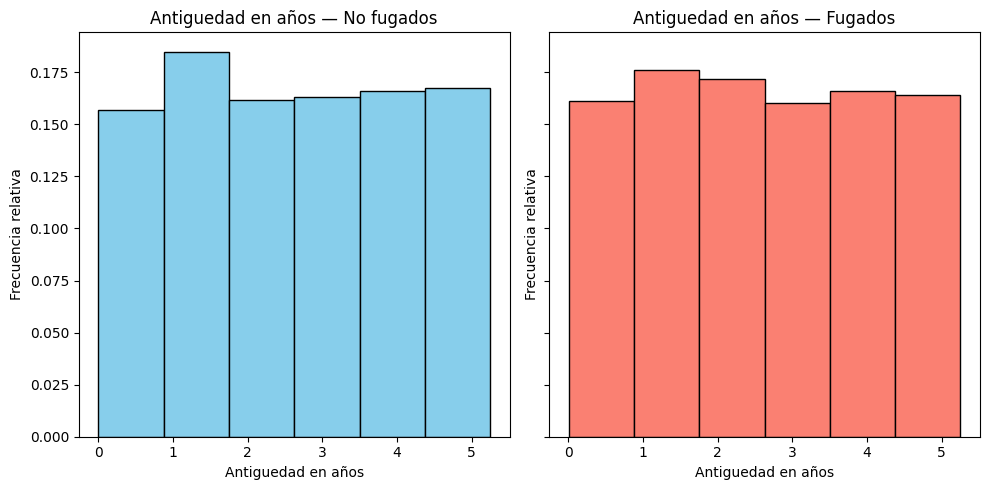

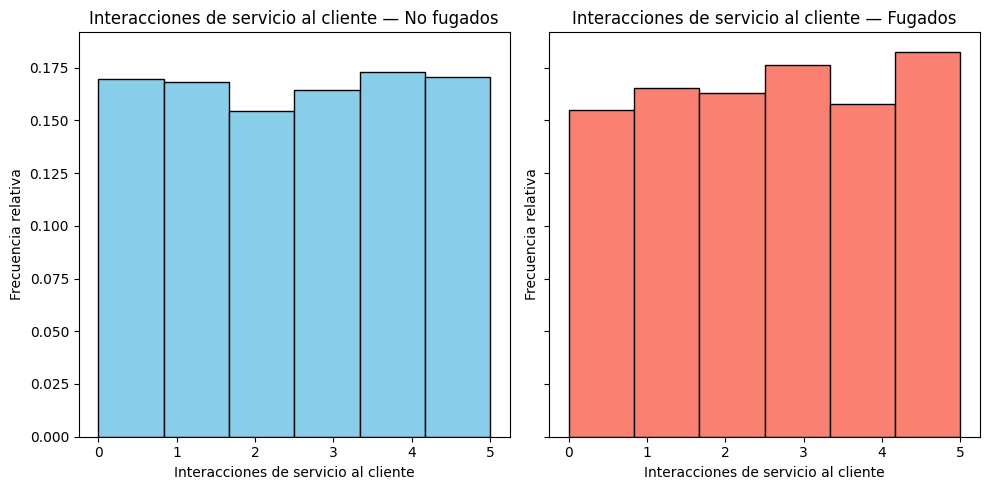

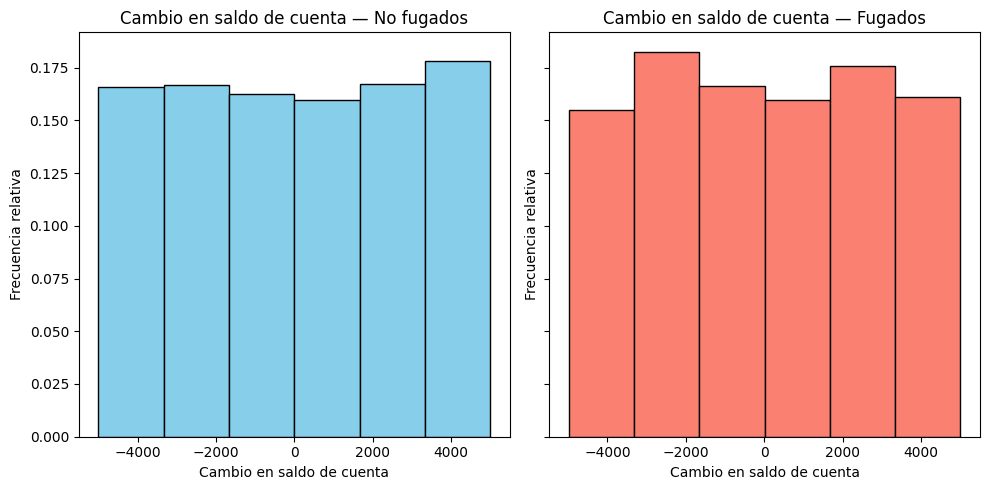

In [354]:
columnas=['Edad','Score crediticio','Ingreso anual','Quejas recientes','Numero de transacciones',
                       'Frecuencia de transacciones por año','Puntuación de satisfacción del cliente',
                       'Antiguedad en años','Interacciones de servicio al cliente','Cambio en saldo de cuenta']

for col in columnas:
    graficar_histograma_separado_por_fuga(df, col)

Al comparar la variables de clientes activos y fugados, podemos observar que:
* Respecto a la edad, si bien el cambio es leve, hay cierta predisposición de las personas mayores a 50 a fugarse.
* La mayor cantidad de clientes fugados (80%), realizó más de una queja recientemente. Mientras que en los clientes activos esta proporción es menor al 60%.
* Más del 70% de los clientes activos mantienen una puntuación de satisfacción del cliente mayor a 3 puntos, mientras que los fugados apenas supera el 40%


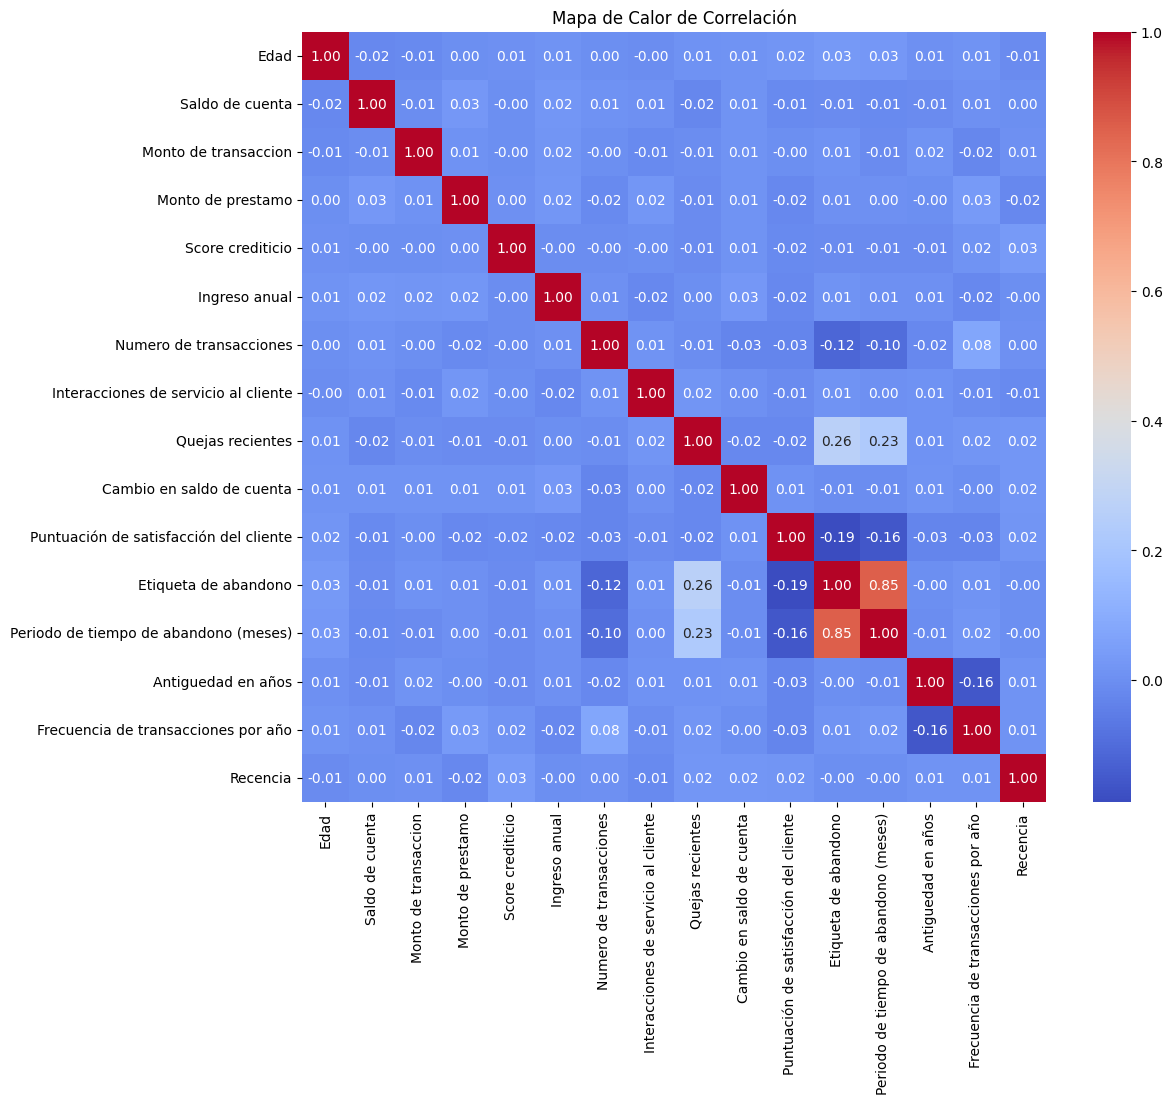

In [321]:

# Selecciona solo columnas numéricas
df_numerico = df.select_dtypes(include=['number'])
correlacion = df_numerico.corr()
plt.figure(figsize=(12, 10))  # Ajusta el tamaño del gráfico
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación')
plt.show()

El gráfico de correlación confirma posibles relaciones de las variables con la fuga de clientes.
Es destacable la relación positiva que tine la variable quejas recientes. Así como se mencionó anteriormente, pareciera tener una relación más fuerte en comparación con otras variables. Por lo que un aumento de quejas, podría indicar una posible fuga de un cliente.

Por otro lado, y en un sentido inverso, la puntuación de satisfacción del cliente podría ser una variable que frena este fenomeno. Aquellos clientes que tienen una puntuación mayor, tienden a permanecer activos en la cartera.

Otra variable que surge es el numero de transacciones. Al igual que la satisfacion del cliente, marca una relación negativa, por lo que podría inferirse que aquellos clientes con mayor numero de transacciones tienen a permanecer en la empresa.
